# More fun with the Ising Model 

For my investigation, I decided to learn more about simulating the Ising model computationally. This simple system has been far more prevalent in my education over the past year than I would've ever expected, but I've never actually tried writing my own simulations with it before.

I also decided to use this project as an excuse to get to know the `Julia` programming language, as it offers a lot of very nice features for scientific computing.
Julia runs with a Just In Time compiler, which gives it a significant speed boost over Python, however it's still easy to use (and read) to the point where it could almost be mistaken for Python. The entirety of this project is done in Julia (See README 

In [1]:
include("lattice_functions.jl")
include("metropolis.jl")
include("wolff_cluster.jl")
using Plots
gr()

Plots.GRBackend()

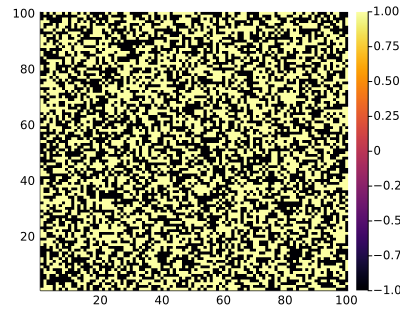

In [2]:
metr_rand = rand([-1, 1], 100, 100)
wolff_rand = copy(metr_rand)
T = 0.9
J = 1.
iters = 10
heatmap(metr_rand, size=(400,320))

Now to actually run these algorithms. To start, we just run each once with a random initial setup.
I generally found that Wolff takes much longer near criticality, but it makes significant progress every time it does. In contrast, Metropolis takes much less time but the lattice shows only minor changes. Below I run them both with the same initial setup, but Metropolis is given 100 times the number of iterations. The algorithms behave about the same at high temperatures, however at temperatures closer to criticality the Wolff Cluster algorithm takes much longer with the benefit of a much more thoroughly evolved system (see below). From simply playing with the code, I found that getting Metropolis to the same point in "lattice time" always took longer (with roughly the same number of allocations) than the Wolff Cluster algorithm.

Wolff Cluster:   2.229431 seconds (3.19 M allocations: 179.442 MiB, 3.17% gc time, 98.35% compilation time)

Metropolis:      0.161398 seconds (111.29 k allocations: 82.916 MiB, 3.52% gc time, 56.20% compilation time)


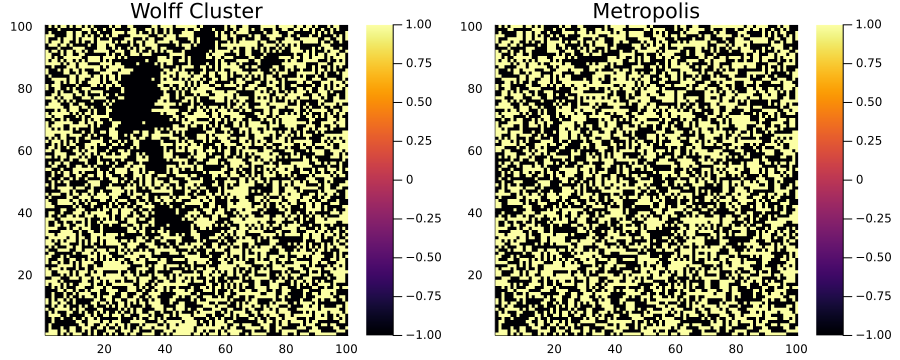

In [3]:
print("Wolff Cluster: ")
cluster_spins = @time wolff(wolff_rand, T, iters);
print("\nMetropolis:    ")
metropolis_spins = @time metropolis(metr_rand, T, 100*iters);

#creating plot objects
plot_cluster = heatmap(cluster_spins, title="Wolff Cluster");
plot_metropolis = heatmap(metropolis_spins, title="Metropolis");

#plotting the plot objects together as subplots
plot(plot_cluster, plot_metropolis, size=(900,360))

Now to compute observables vs lattice time. The magnetization is an obvious candidate. I compute this as an average spin per site:
$$\frac{1}{N}\sum_i\langle s_i\rangle$$
Which is straightforward to compute (see the relevant function in `lattice_functions.jl` for the 2 lines of code).
I plot this vs number of iterations, which I take to be representative of a small step forward in time. I'm performing this calculation at T = 0.8, so in the Ferromagnetic phase.

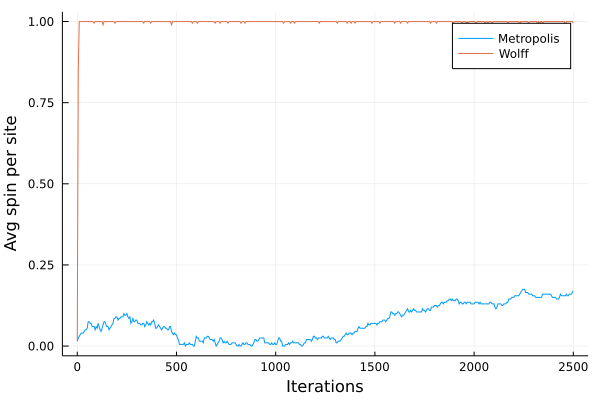

In [23]:
rand_spins = rand([-1, 1], 20, 20)
T = 0.8

metro_spins = copy(rand_spins)
wolff_spins = copy(rand_spins)
metro_mag = [compute_magnetization(metro_spins)]
wolff_mag = [compute_magnetization(wolff_spins)]
for i in 1:500
    metro_spins = metropolis(metro_spins, T, 5)
    magnetization = compute_magnetization(metro_spins)
    append!(metro_mag, magnetization)
    wolff_spins = wolff(wolff_spins, T, 5)
    magnetization = compute_magnetization(wolff_spins)
    append!(wolff_mag, magnetization)
end

plot(0:5:2500,[metro_mag, wolff_mag], label = ["Metropolis" "Wolff"])
xlabel!("Iterations")
ylabel!("Avg spin per site")